# Prize-Collecting Steiner Tree (PCSTP)

## Libs Importing

In [1]:
import sys
import os
import time
import networkx as nx

sys.path.insert(1, os.path.realpath(os.path.pardir))

In [2]:
from pcstp.instances.generator import generate_random_steiner
from pcstp.instances.reader import SteinlibReader, DatReader

from pcstp.steinertree import SteinerTreeProblem
from pcstp.solver.base import computes_steiner_cost
from pcstp.solver.aco import AntColony

from pcstp.utils.graph import preprocessing
from pcstp.utils.draw import draw_steiner_graph



## Experiments

In [3]:
SEED = 100

In [4]:
G, (nodes, edges, position_matrix, edges_cost, terminals, prizes) = generate_random_steiner(
    num_nodes=25,
    num_edges=20,
    max_node_degree=10,
    min_prize=0,
    max_prize=100,
    num_terminals=5,
    min_edge_cost=0,
    max_edge_cost=10,
    cost_as_length=False,
    max_iter=100,
    seed=SEED
)

terminals:  (5,)
prizes:  (5,)


In [5]:
stp = SteinerTreeProblem(graph=G, terminals=terminals)

In [6]:
import glob

INSTANCES_PATH_PREFIX = '../data/instances/stp'
NUM_EXPERIMENTS_PER_INSTANCE = 10

all_files = glob.glob(os.path.join(INSTANCES_PATH_PREFIX, '*'))

files = all_files # ['C01-A.stp']

networkx_history = []

for filename in files:
    if filename.endswith('.stp'):
        stp_reader = SteinlibReader()
    else:
        stp_reader = DatReader()

    print(f"Reading: {filename}")
    stp = stp_reader.parser(filename=filename)
    G, terminals = preprocessing(stp.graph, stp.terminals)
    stp_preprocessed = SteinerTreeProblem(graph=G, terminals=terminals)

    for experiment in range(1, NUM_EXPERIMENTS_PER_INSTANCE+1):
        start_time = time.time()
        nx_steiner_tree = nx.algorithms.approximation.steinertree.steiner_tree(
            stp.graph,
            stp.terminals,
            weight='cost'
        )

        networkx_duration = time.time() - start_time
        networkx_cost = computes_steiner_cost(stp.graph, nx_steiner_tree, stp.terminals)

        history = {
            "filename": filename,
            "experiment": experiment,
            "num_nodes": stp.num_nodes,
            "num_edges": stp.num_edges,
            "num_nodes_after_preprocessing": len(stp_preprocessed.graph.nodes),
            "num_edges_after_preprocessing": len(stp_preprocessed.graph.edges),
            "terminals": stp.num_terminals,
            "steiner_cost": networkx_cost,
            "duration": networkx_duration
        }
        networkx_history.append(history)

Reading: ../data/instances/stp/C01-A.stp
Reading: ../data/instances/stp/K100.1.stp


In [7]:
import pandas as pd

df_score_networkx = pd.DataFrame.from_dict(networkx_history)

In [8]:
df_score_networkx

,filename,experiment,num_nodes,num_edges,num_nodes_after_preprocessing,num_edges_after_preprocessing,terminals,steiner_cost,duration
0,../data/instances/stp/C01-A.stp,1,500,625,311,436,5,88,0.773656
1,../data/instances/stp/C01-A.stp,2,500,625,311,436,5,88,0.736898
2,../data/instances/stp/C01-A.stp,3,500,625,311,436,5,88,0.707741
3,../data/instances/stp/C01-A.stp,4,500,625,311,436,5,88,0.785528
4,../data/instances/stp/C01-A.stp,5,500,625,311,436,5,88,0.819449
5,../data/instances/stp/C01-A.stp,6,500,625,311,436,5,88,0.828472
6,../data/instances/stp/C01-A.stp,7,500,625,311,436,5,88,0.672438
7,../data/instances/stp/C01-A.stp,8,500,625,311,436,5,88,0.697314
8,../data/instances/stp/C01-A.stp,9,500,625,311,436,5,88,0.700283
9,../data/instances/stp/C01-A.stp,10,500,625,311,436,5,88,0.732962


In [15]:
df_score_networkx.groupby('filename')[['duration', 'steiner_cost']].describe()

duration                                \
                                    count      mean       std       min   
filename                                                                  
../data/instances/stp/C01-A.stp      10.0  0.745474  0.053861  0.672438   
../data/instances/stp/K100.1.stp     10.0  0.039891  0.010414  0.034019   

                                                                          \
                                       25%       50%       75%       max   
filename                                                                   
../data/instances/stp/C01-A.stp   0.702147  0.734930  0.782560  0.828472   
../data/instances/stp/K100.1.stp  0.035888  0.036791  0.038082  0.069277   

                                 steiner_cost                           \
                                        count      mean  std       min   
filename                                                                 
../data/instances/stp/C01-A.stp          10.0      88.0  0.0      88.0   
../data/instances/stp/K100.1.stp         10.0  259638.0  0.0  259638.0   

                                                                          
                                       25%       50%       75%       max  
filename                                                                  
../data/instances/stp/C01-A.stp       88.0      88.0      88.0      88.0  
../data/instances/stp/K100.1.stp  259638.0  259638.0  259638.0  259638.0

## Solution obtained with Ant Colony Optimization

In [16]:
import glob

INSTANCES_PATH_PREFIX = '../data/instances/stp'
NUM_EXPERIMENTS_PER_INSTANCE = 1

all_files = glob.glob(os.path.join(INSTANCES_PATH_PREFIX, '*'))

files = all_files

networkx_history = []

for filename in files:
    if filename.endswith('.stp'):
        stp_reader = SteinlibReader()
    else:
        stp_reader = DatReader()

    print(f"Reading: {filename}")
    stp = stp_reader.parser(filename=filename)
    G, terminals = preprocessing(stp.graph, stp.terminals)
    stp_preprocessed = SteinerTreeProblem(graph=G, terminals=terminals)


    for experiment in range(1, NUM_EXPERIMENTS_PER_INSTANCE+1): 
        aco_params = dict(
            iterations=100,
            num_ants=1,
            evaporation_rate=0.2,
            alpha=1.0,
            beta=1,
            beta_evaporation_rate=0.4,
            initial_pheromone=0.1,
            pheromone_amount=1,
            pheromone_initialization_strategy='same_value',
            choose_best=0.3,
            log_level='info',
            early_stopping=None,
            seed=SEED
        )
        solver = AntColony(
            graph=stp_preprocessed.graph,
            terminals=stp_preprocessed.terminals,
            **aco_params
        )
        steiner_tree, steiner_cost = solver.solve()

        history = {
            "filename": filename,
            "experiment": experiment,
            "num_nodes": stp.num_nodes,
            "num_edges": stp.num_edges,
            "num_nodes_after_preprocessing": len(stp_preprocessed.graph.nodes),
            "num_edges_after_preprocessing": len(stp_preprocessed.graph.edges),
            "terminals": stp.num_terminals,
            "steiner_cost": steiner_cost,
            "duration": solver._duration
        }
        history.update(aco_params)
        networkx_history.append(history)


Reading: ../data/instances/stp/C01-A.stp


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Steiner Cost')

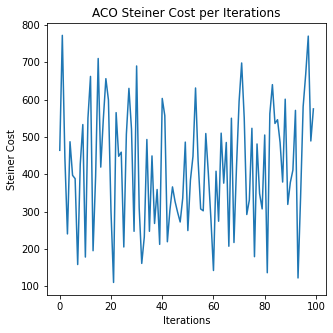

In [ ]:

fig, ax = plt.subplots(1, 1,figsize=(5,5))

ax.plot(solver.history)
ax.set_title("ACO Steiner Cost per Iterations")
ax.set_xlabel("Iterations")
ax.set_ylabel("Steiner Cost")